In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
f = xr.open_mfdataset('./MLMOutput_basic_fxdlhf_20210330_highres.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f

<xarray.Dataset>
Dimensions:        (x: 4, y: 505, z: 3001)
Coordinates:
  * z              (z) float32 0.0 1.0 2.0 3.0 ... 2997.0 2998.0 2999.0 3000.0
Dimensions without coordinates: x, y
Data variables:
    t              (y) float32 dask.array<chunksize=(505,), meta=np.ndarray>
    t_hr           (y) float32 dask.array<chunksize=(505,), meta=np.ndarray>
    t_hr_local     (y) float32 dask.array<chunksize=(505,), meta=np.ndarray>
    F_rad0         (y) float32 dask.array<chunksize=(505,), meta=np.ndarray>
    zi             (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndarray>
    zb             (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndarray>
    sst            (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndarray>
    LHF            (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndarray>
    SHF            (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndarray>
    we             (y, x) float32 dask.array<chunksize=(505, 4), meta=np.ndar

In [4]:
myfontsize = 12

In [5]:
# defining a function for axe plotting
def pltbflx(iax, it, iz, ivar, ivarzi, ivarzb, ivarBIR):
    mylevels = np.linspace(-25, 25, 13)

    oax = iax.contourf(it,iz,ivar, cmap = cm.RdBu_r, levels = mylevels, extend = 'max')

    iax.plot(it, ivarzi, color = 'black',label=r"$\mathrm{z_i}$")
    iax.plot(it, ivarzb, color = 'black',label=r"$\mathrm{z_b}$", linestyle = '--')

    iax.set_ylabel('z (m)', fontsize=myfontsize)  # Add an x-label to the axes.
    iax.set_ylim([0., 1000])
    iax.legend(loc="upper left", fontsize=myfontsize, frameon=False, labelspacing = 0.15)

    iax0 = iax.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    iax0.set_ylabel('BIR', color=color)  # we already handled the x-label with ax1
    iax0.plot(it, ivarBIR, color=color)
    iax0.tick_params(axis='y', labelcolor=color)
    iax0.set_ylim([-0.01, 0.16])
    
    return oax

In [6]:
def plt2var(iax, it, ivar, ivar1, ivarname, ivarname1):
    iax.plot(it, ivar, color = 'black',label=ivarname)
    iax.set_ylabel(ivarname)
    
    iax0 = iax.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    iax0.set_ylabel(ivarname1, color=color)  # we already handled the x-label with ax1
    iax0.plot(it, ivar1, color=color)
    iax0.tick_params(axis='y', labelcolor=color)
    
    iax.grid(True)

In [7]:
def pltcleb(iax, it, ivarEnt, ivarDiab, ivarRes, ivarStore, ivarRad, ivarPrec):
    iax.plot(it, ivarEnt,label='Ent')
    iax.plot(it, ivarDiab,label='Diab', color = 'black')
    iax.plot(it, ivarRes,label='Base')
    iax.plot(it, ivarStore,label='Stor')
    iax.plot(it, ivarRad,label='Rad', color = 'black', linestyle = '--', alpha=1)
    iax.plot(it, ivarPrec,label='Prec', color = 'black', linestyle = '-.', alpha=1)
    
    iax.set_ylabel(r"$\mathrm{W m^{-2}}$", fontsize=myfontsize)
    iax.set_xlabel("Hour (h)", fontsize=myfontsize)
    iax.set_ylim((-70, 70))
    iax.axhline(y=0., linewidth=1, color='black', linestyle='--')
    iax.legend(bbox_to_anchor=(1.,0.5), loc="center left", fontsize=0.9*myfontsize)

    iax.grid(True)

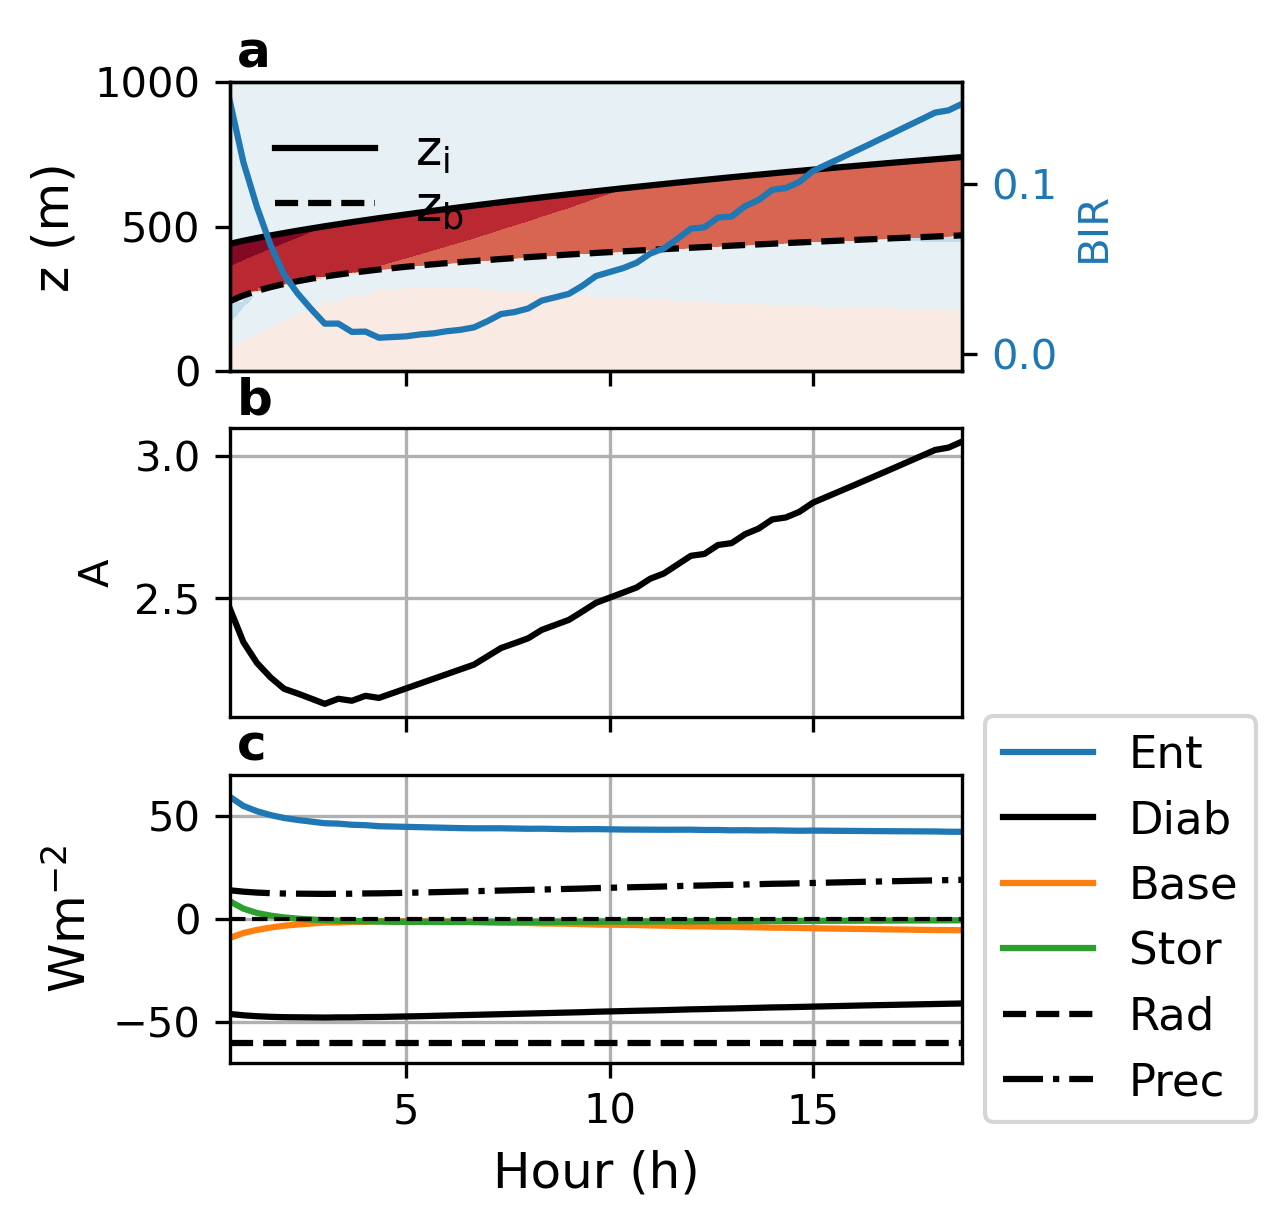

In [8]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 3,
                        sharex = True, sharey = False,
                        figsize=(8/2.54, (11)/2.54), dpi = 300)

#
oax = pltbflx(axs[0], f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15), f['z'], 
              f['sv_flux'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15), 
              f['zi'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15), 
              f['zb'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
              f['BIR'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15))

#
axs[1].plot(f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15),
              f['A'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
              color = 'black',label=r"$\mathrm{A}$")

axs[1].set_ylabel(r"$\mathrm{A}$")
axs[1].grid(True)

#
pltcleb(axs[2], f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15),
        f['Ent_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15), 
        f['Diab_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
        -f['Res_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
        f['Store_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
        f['Rad_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15),
        f['Prec_CLEB'].isel(x = 3).where(f['BIR'].isel(x = 3) < 0.15))

t = f['t_hr'].where(f['BIR'].isel(x = 3) < 0.15)
axs[0].set_xlim([t.min(), t.max()])

mylabel = np.array(('a','b','c'))
for i in range(3):
    axs[i].text(0.01, 1.05, mylabel[i], transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')
    
fig.savefig('Fig6_MLM.png', dpi=fig.dpi, bbox_inches='tight')